In [2]:
library(Seurat)
library(WGCNA)
library(igraph)
library(ggplot2)
library(pheatmap)

Attaching SeuratObject

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
as_matrix <- function(mat){
  
  tmp <- matrix(data=0L, nrow = mat@Dim[1], ncol = mat@Dim[2])
  
  row_pos <- mat@i+1
  col_pos <- findInterval(seq(mat@x)-1,mat@p[-1])+1
  val <- mat@x
  
  for (i in seq_along(val)){
    tmp[row_pos[i],col_pos[i]] <- val[i]
  }
  
  row.names(tmp) <- mat@Dimnames[[1]]
  colnames(tmp) <- mat@Dimnames[[2]]
  return(tmp)
}

In [4]:
dataobj<- readRDS('/data1//chenyx//HHCAd//unit_organized_fetal/Aorta.rds')

In [5]:
table(dataobj$cell_type)


Cardiomyocyte cell   Endothelial cell         Lymphocyte          Mast cell 
                 1                  1                  1                  4 
         Myelocyte Smooth muscle cell 
                 5                 36 

# Myelo

In [12]:
ct = "Myelocyte"

In [13]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [14]:
df <- df[apply(df,1,mad)>0,]

In [15]:
dim(df)

[1] 3185    5

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

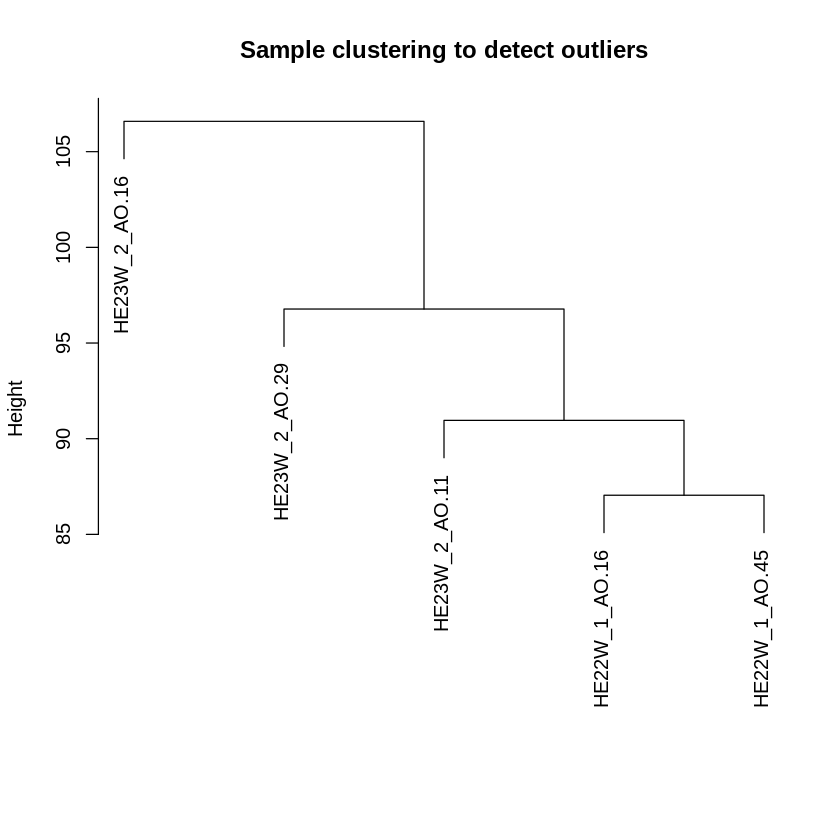

In [16]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [17]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


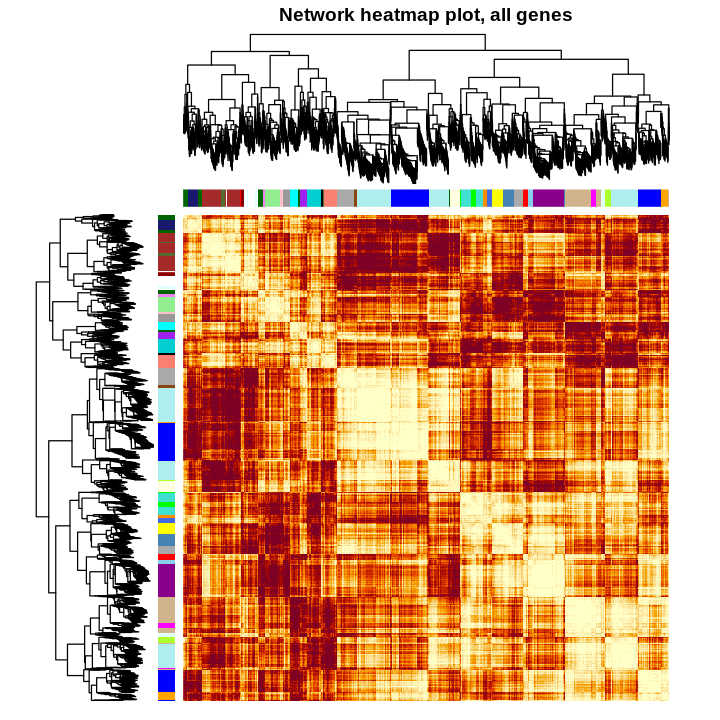

In [18]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

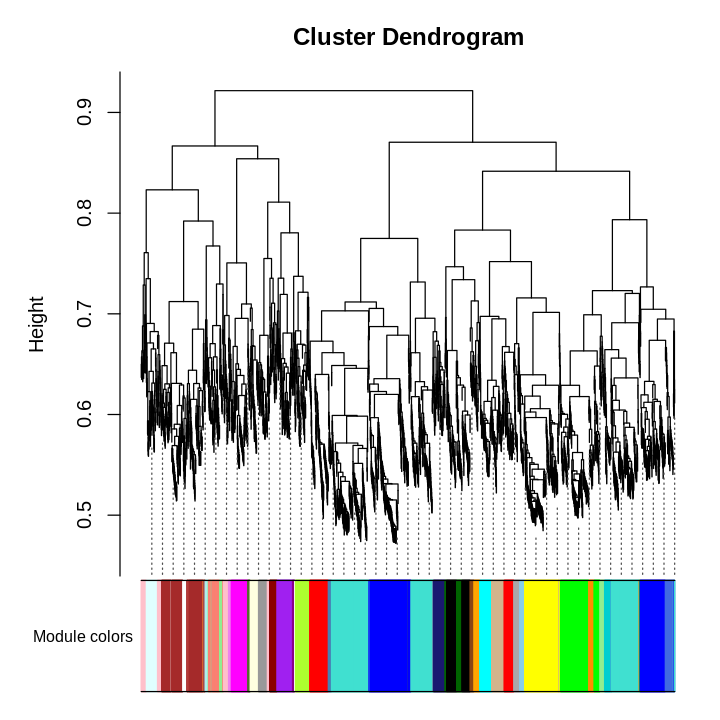

In [19]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [20]:
colors <- table(net$colors)
colors


         black           blue          brown           cyan      darkgreen 
           109            403            228             70             41 
      darkgrey    darkmagenta darkolivegreen     darkorange        darkred 
            37             14             16             35             44 
 darkturquoise          green    greenyellow         grey60      lightcyan 
            40            209             86             53             66 
    lightgreen    lightyellow        magenta   midnightblue         orange 
            51             49             98             70             36 
 paleturquoise           pink         purple            red      royalblue 
            18            101             92            168             49 
   saddlebrown         salmon        skyblue      steelblue            tan 
            23             70             30             19             78 
     turquoise         violet          white         yellow 
           525            

In [21]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [23]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','AO/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# SMC

In [24]:
ct = "Smooth muscle cell"

In [25]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [26]:
df <- df[apply(df,1,mad)>0,]

In [27]:
dim(df)

[1] 2100   36

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

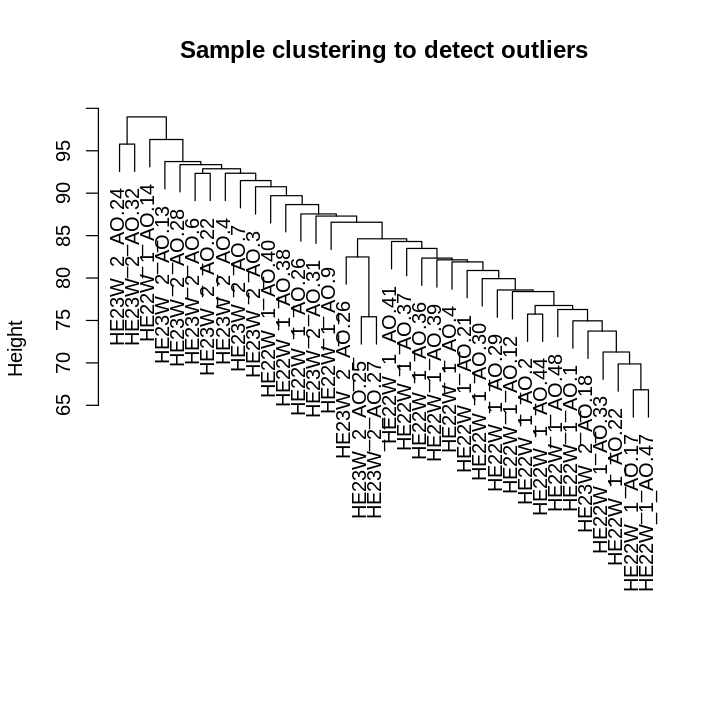

In [28]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [29]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 126 genes from module 1 because their KME is too low.
     ..removing 93 genes from module 2 because their KME is too low.
     ..removing 69 genes from module 3 because their KME is too low.
     ..removing 27 genes from module 4 because their KME is too low.
     ..removing 37 genes from module 5 because their KME is too low.
     ..removing 15 genes from module 7 because their KME is too low.
     ..removing 2 genes from module 8 bec

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


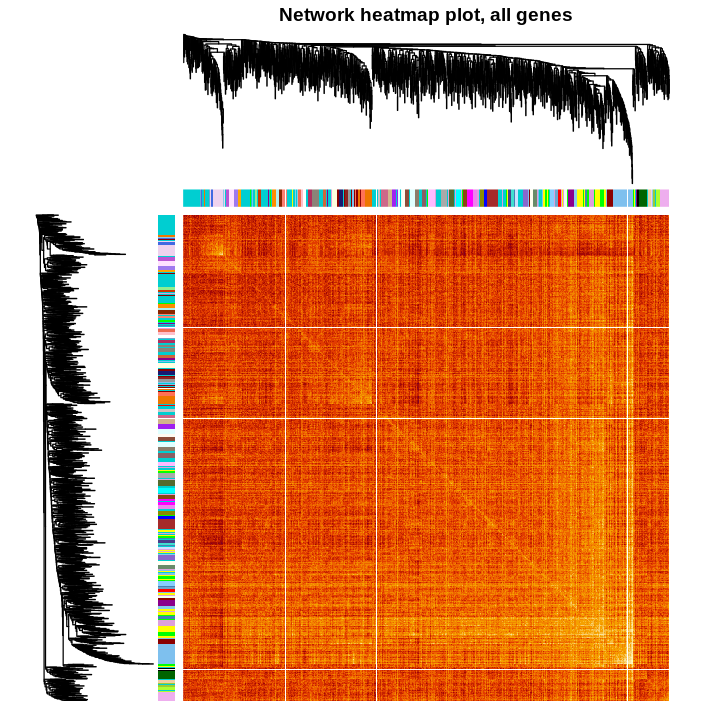

In [30]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

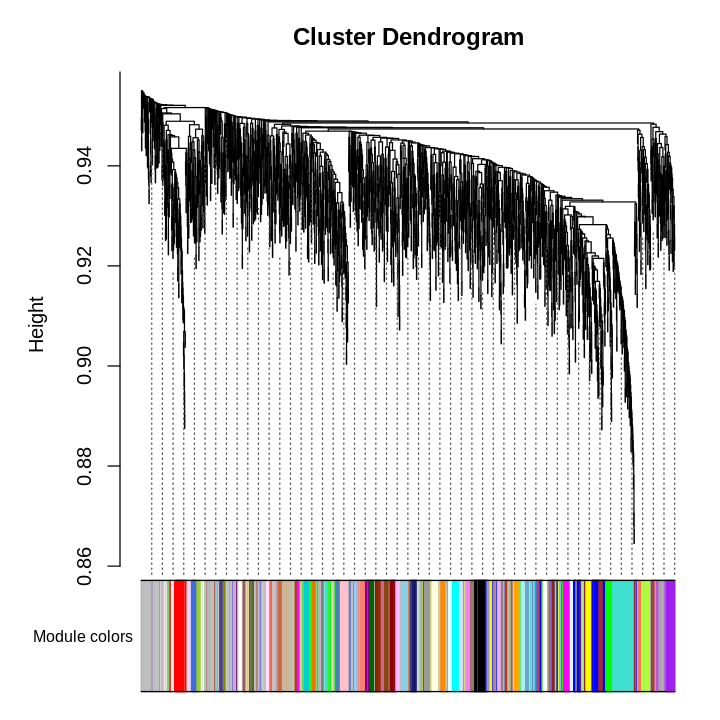

In [31]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [32]:
colors <- table(net$colors)
colors


  antiquewhite4         bisque4           black            blue           brown 
             11              14              44             101              80 
         brown4          coral1          coral2            cyan       darkgreen 
             15              11              11              26              22 
       darkgrey     darkmagenta  darkolivegreen      darkorange     darkorange2 
             21              18              18              21              15 
        darkred   darkseagreen4   darkslateblue   darkturquoise     floralwhite 
             22              11              14              22              16 
          green     greenyellow            grey          grey60       honeydew1 
             70              34             445              24              12 
          ivory  lavenderblush3       lightcyan      lightcyan1      lightgreen 
             16              12              26              16              24 
     lightpink4 lightsteelb

In [33]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [34]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','AO/',ct,'.',i,'.csv'))
        i = i + 1
    }
}